In [5]:
import numpy as np
import pandas as pd
from sklearn import linear_model
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sqlalchemy import create_engine

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))

house = pd.read_sql_query('select * from houseprices',con=engine)

engine.dispose()


In [15]:
# Start out with a simply univariate regression with above-ground square footage against sale price

Y = house['saleprice']

X = house[['grlivarea']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.502
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     1471.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):          4.52e-223
Time:                        23:28:18   Log-Likelihood:                -18035.
No. Observations:                1460   AIC:                         3.607e+04
Df Residuals:                    1458   BIC:                         3.608e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1.857e+04   4480.755      4.144      0.000    9779.612    2.74e+04
grlivarea    107.1304      2.794     38.348      0.000     101.650     112.610
==============================================================================
Omnibus:                      261.166   Durbin-Watson:                   2.023
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3432.287
Skew:                           0.410   Prob(JB):                         0.00
Kurtosis:                      10.467   Cond. No.                     4.90e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.9e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
# Add in basement square footage

X = house[['grlivarea', 'totalbsmtsf']]
X = sm.add_constant(X)

results = sm.OLS(Y,X).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.609
Model:                            OLS   Adj. R-squared:                  0.609
Method:                 Least Squares   F-statistic:                     1135.
Date:                Wed, 13 Nov 2019   Prob (F-statistic):          6.54e-298
Time:                        23:31:00   Log-Likelihood:                -17858.
No. Observations:                1460   AIC:                         3.572e+04
Df Residuals:                    1457   BIC:                         3.574e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.348e+04   4283.806     -3.147      0.002   -2.19e+04   -5075.919
grlivarea      81.8768      2.781     29.446      0.000      76.422      87.331
totalbsmtsf    66.4998      3.331     19.967      0.000      59.967      73.033
==============================================================================
Omnibus:                      775.485   Durbin-Watson:                   1.963
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            59606.707
Skew:                          -1.605   Prob(JB):                         0.00
Kurtosis:                      34.137   Cond. No.                     6.39e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.39e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [18]:
# Add number of bathrooms and quality/condition of house

X = house[['grlivarea', 'totalbsmtsf', 'fullbath', 'halfbath', 'overallqual', 'overallcond']]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.746
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     709.7
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:34:11   Log-Likelihood:                -17545.
No. Observations:                1460   AIC:                         3.510e+04
Df Residuals:                    1453   BIC:                         3.514e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.204e+05   7651.060    -15.740      0.000   -1.35e+05   -1.05e+05
grlivarea      41.6896      3.210     12.986      0.000      35.392      47.987
totalbsmtsf    41.6668      3.161     13.183      0.000      35.467      47.867
fullbath     8609.0775   2698.300      3.191      0.001    3316.098    1.39e+04
halfbath     7722.5393   2525.974      3.057      0.002    2767.593    1.27e+04
overallqual  2.649e+04   1093.488     24.227      0.000    2.43e+04    2.86e+04
overallcond  2887.4883    984.542      2.933      0.003     956.212    4818.764
==============================================================================
Omnibus:                      492.280   Durbin-Watson:                   1.952
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            45249.631
Skew:                          -0.585   Prob(JB):                         0.00
Kurtosis:                      30.248   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Even with just 6 variables, we already have a storng R^2 value of .746.

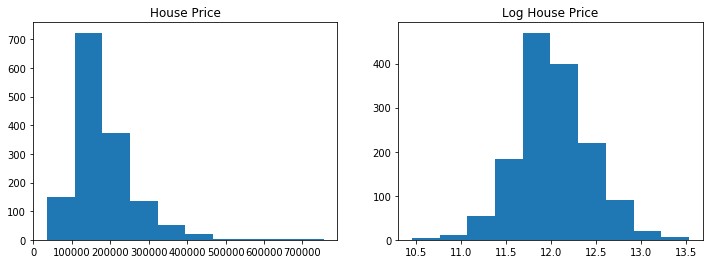

In [26]:
plt.figure(figsize=(12,4))

plt.subplot(1,2,1)
plt.title('House Price')
plt.hist(house.saleprice)

plt.subplot(1,2,2)
plt.title('Log House Price')
plt.hist(np.log(house.saleprice))

plt.show()

The Log of house price is more normally distributed than our nominal house price. Let's run our same model on log house price and see how it does.

In [25]:
house['logsaleprice'] = np.log(house['saleprice'])

Y = house['logsaleprice']

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logsaleprice   R-squared:                       0.783
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     876.0
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:42:14   Log-Likelihood:                 385.42
No. Observations:                1460   AIC:                            -756.8
Df Residuals:                    1453   BIC:                            -719.8
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const          10.3441      0.035    291.424      0.000      10.274      10.414
grlivarea       0.0001   1.49e-05      8.915      0.000       0.000       0.000
totalbsmtsf     0.0002   1.47e-05     15.575      0.000       0.000       0.000
fullbath        0.1047      0.013      8.362      0.000       0.080       0.129
halfbath        0.0866      0.012      7.393      0.000       0.064       0.110
overallqual     0.1382      0.005     27.242      0.000       0.128       0.148
overallcond     0.0354      0.005      7.750      0.000       0.026       0.044
==============================================================================
Omnibus:                      903.142   Durbin-Watson:                   1.962
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            30332.727
Skew:                          -2.328   Prob(JB):                         0.00
Kurtosis:                      24.839   Cond. No.                     1.42e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Our R^2 value goes up slightly and our t-values do as well. I vaguely remember there being a necessary adjustment to R^2 when you use a log-transformed dependent variable, but I can't remember what it was. 

In [29]:
X = house[['grlivarea', 'totalbsmtsf', 'fullbath', 'halfbath', 'overallqual', 'overallcond', 'yearbuilt', 'garagearea']]
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           logsaleprice   R-squared:                       0.832
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     899.2
Date:                Wed, 13 Nov 2019   Prob (F-statistic):               0.00
Time:                        23:52:14   Log-Likelihood:                 571.46
No. Observations:                1460   AIC:                            -1125.
Df Residuals:                    1451   BIC:                            -1077.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const           3.4992      0.453      7.728      0.000       2.611       4.387
grlivarea       0.0002   1.56e-05     15.563      0.000       0.000       0.000
totalbsmtsf     0.0001   1.37e-05      9.927      0.000       0.000       0.000
fullbath        0.0148      0.012      1.204      0.229      -0.009       0.039
halfbath        0.0176      0.011      1.577      0.115      -0.004       0.040
overallqual     0.0912      0.005     18.116      0.000       0.081       0.101
overallcond     0.0609      0.004     14.241      0.000       0.053       0.069
yearbuilt       0.0035      0.000     15.154      0.000       0.003       0.004
garagearea      0.0003   2.65e-05      9.625      0.000       0.000       0.000
==============================================================================
Omnibus:                     1195.513   Durbin-Watson:                   1.984
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           101001.322
Skew:                          -3.236   Prob(JB):                         0.00
Kurtosis:                      43.230   Cond. No.                     2.93e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.93e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

One interesting thing to note is that our bathroom variables became statistically insignificant once we added more factors to our model. This might indicate that these are correlated with other factors that more directly affect selling price. 